In [4]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6"  color="red">ch10. N차원 배열(Numpy) </font></b>

- [numpy](https://numpy.org)
- [numpy documents](https://numpy.org/doc/stable)

- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절 넘파이 패키지

In [5]:
import numpy as np
np.__version__

'1.23.5'

In [6]:
#np.range(from,stop,by) : from부터 stop앞까지 by씩 증가하는 1차원 배열 생성
a=np.arange(15) # 0부터 15앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열속성

In [7]:
from numpy import arange
a= arange(15,
         # dtype=np.int32  기본이 32
         ).reshape(3,5)# 3행 5열짜리 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
type(a) # a변수의 타입

numpy.ndarray

In [9]:
a.dtype #a배열의 요소들의 type

dtype('int32')

In [10]:
a.dtype.name

'int32'

In [11]:
a.itemsize # a배열안의 한 요소의 bytesize

4

In [12]:
a.ndim #축수(차원수)

2

In [13]:
a.size # 배열요소의 갯수

15

In [14]:
print(a.dtype, a.itemsize, a.size, a.nbytes)
# itemsize :배열 크기(원소 개수)가 아니라 “원소 하나의 크기”입니다.
# 배열 전체 메모리 사용량은 a.nbytes로 확인합니다. 예를 들어 위 예시에서 a.size가 15이고 itemsize가 4이므로 nbytes는 60이 됩니다.

int32 4 15 60


In [15]:
a.shape #배열의 구조(3행5열)

(3, 5)

In [16]:
print('shape 조정 전 a\n', a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [17]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [18]:
print('shape 조정 전 a\n', a)
a.shape=(5,3)
print('shape 조정 후 a\n', a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [19]:
a= arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [20]:
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
print('dtype 조정 전 ',a.dtype, a.itemsize, a.size, a.nbytes)

dtype 조정 전  int32 4 12 48


In [22]:
a.dtype=np.int64 # 읽을 때 int64로(64bit씩) 읽는다.
a.dtype

dtype('int64')

In [23]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [24]:
print('dtype 조정후 ', a.dtype, a.itemsize, a.size, a.nbytes)

dtype 조정후  int64 8 6 48


In [25]:
a.dtype=np.int32

In [26]:
a=a.astype('int64')
a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [27]:
print('astype 조정후 ', a.dtype, a.itemsize, a.size, a.nbytes)

astype 조정후  int64 8 12 96


In [28]:
a.ravel() #flatten된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [29]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열저장

- pkl(객체저장,배열 ,머신러닝 모델) vs npy(넘파이 전용 포맷,io속도 개선)

In [30]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

### * pickle로 저장,불러오기

In [31]:
%%time
# 매직명령어는 제일 위에 셀에 위치하고 , 옆에 아무것도 없이 단독으로 있어야 함
import pickle
with open('data/ch10.pk1', 'wb') as f:
    pickle.dump(a,f)

CPU times: total: 31.2 ms
Wall time: 1.02 ms


In [32]:
%%time
with open('data/ch10.pk1', 'rb')  as f:
    loaded_a=pickle.load(f)

CPU times: total: 0 ns
Wall time: 1.99 ms


In [33]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

### * npy로 저장 불러오기

In [36]:
%%time
np.save('data/ch10.npy',a) #저장

CPU times: total: 46.9 ms
Wall time: 2 ms


In [37]:
%%time
loaded_a2=np.load('data/ch10.npy')

CPU times: total: 15.6 ms
Wall time: 12.9 ms


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list,tuple)로 배열로 변환
- 기타함수들 : arange, ones, zeros, full, empty, ...,linspace
- 랜덤값을 갖는 함수들 : np.random.~


## 2.1 array()함수로 넘파이 배열 만들기

    - array(obj, dtype=np.xx 나  'xx', copy=T/F)

In [39]:
a=np.array([2,4,6], dtype=np.int16) # 정수의 기본타입은 int32
a

array([2, 4, 6], dtype=int16)

In [40]:
a[0],a[1],a[2]

(2, 4, 6)

In [41]:
for i in a:
    print(i,end='\t')

2	4	6	

In [44]:
b=np.array([[1.5,2.3],  #배열은 동일 자료형의 집합 :  정수 => 실수 =>문자
           [4,   5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [48]:
b[0][1],b[0,1] #2차원 [axis0행, axis1열]

(2.3, 2.3)

In [45]:
l=[[1.5,2.3],[4,5]]
l[0][1]

2.3

In [51]:
print(b.dtype)  # 정수 기본타입은 in32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [54]:
b=b.astype(np.float32)   # 주의 : 이렇게 하면 다른 결과 b.dtype=np.float32
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [55]:
print(b.dtype)  
print(b.itemsize)

float32
4


In [58]:
for row in b:
    for item in row:
        print(item,end='\t')
    print() #개행

1.5	2.3	
4.0	5.0	


In [61]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {:.1f}({:.1f})'.format(i,j,item,b[i,j]),end='\t')
    print() #개행

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


### *인덱싱

In [63]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]],dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [64]:
b[0,1]

2

In [65]:
b[3,0] # 없는 인덱싱시 에러

IndexError: index 3 is out of bounds for axis 0 with size 3

### * 슬라이싱

In [85]:
print('0~1행, 1~2열 :\n',b[0:2,1:3])
print('2행 모두(1차원) :',b[2,:], b[2])                       # 특정행, 모든 열을 추출할 경우, 열생략 가능
print('2행 모두(2차원) :',b[2:3,:], b[2:3]) 
print('4열(1차원) 모두 :',b[:,4],b[...,4],b[:,-1])            # 특정열, 모든 행을 추출할 경우
print('4열(2차원) 모두\n',b[:,4:],b[...,4:],b[:,-1:])
print('2행 0~3열 :', b[2,0:4],b[2,0:-1])
print('마지막열 제외 :\n', b[:,:-1])                          /    # 마지막열을 제외한 모든 것

0~1행, 1~2열 :
 [[2 3]
 [7 8]]
2행 모두(1차원) : [11 12 13 14 15] [11 12 13 14 15]
2행 모두(2차원) : [[11 12 13 14 15]] [[11 12 13 14 15]]
4열(1차원) 모두 : [ 5  0 15] [ 5  0 15] [ 5  0 15]
4열(2차원) 모두
 [[ 5]
 [ 0]
 [15]] [[ 5]
 [ 0]
 [15]] [[ 5]
 [ 0]
 [15]]
2행 0~3열 : [11 12 13 14] [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [86]:
#스칼라변수
a=10
copy_a=a  #복제본
print(f"a={a}, 복제본{copy_a}")
copy_a=-1
print(f"a={a}, 복제본{copy_a}")

a=10, 복제본10
a=10, 복제본-1


In [88]:
#데이터구조
a=[0,1]
copy_a=a.copy()  #깊은복사
print(f"a={a}, 복제본{copy_a}")
copy_a[0]=-1
print(f"a={a}, 복제본{copy_a}")

a=[0, 1], 복제본[0, 1]
a=[0, 1], 복제본[-1, 1]


In [4]:
# numpy 배열
c = np.array([[1,2],[3,4]])
d = c # 주소할당
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c),id(d))
d[0,0]=9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
2680140576688 2680140576688
c=
[[9 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


In [3]:
# numpy 배열
import numpy as np
c = np.array([[1,2],[3,4]])
d =  np.array(c,copy=True) # 복제  ; d=c.copy()
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c),id(d))
d[0,0]=9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
2680140577360 2680140577456
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기

- np.zeros(tup)          : 요소들이 다 0
- np.ones(tup)           : 요소들이 다 1
- np.full(tup, 기본값)   : 요소들이 다 두번째 매개변수
- np.empty(tup)          : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

<font color=red>※</font> 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64.dtype을 따로 지정가능

### zeros()

In [49]:
x = np.zeros( (3,2) ) # 3행2열짜리 2차원 float64 배열(요소들은 다 0)
# x = np.zeros( 3,2 ) # 에러
x = np.zeros( (3,) ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x = np.zeros( 3 ) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [10]:
x= np.zeros((2,5),dtype=np.int16)
print(x)
print(x.dtype)
print(x.itemsize)

[[0 0 0 0 0]
 [0 0 0 0 0]]
int16
2


In [11]:
x= np.zeros((2,5),dtype=np.bool8)
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


### ones()

In [12]:
np.ones((2,5),dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [19]:
x= np.ones((2,5),dtype=np.int8)
x

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [18]:
y= np.ones((2,5),dtype=np.uint8)
y

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

### full()

In [25]:
np.full((2,3),-1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

칼라를 입력하세요125


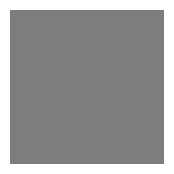

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))                  # 시각화한 그래프 크기 figsize = (가로,세로)
colorN = int(input("칼라를 입력하세요"))
img = np.full((28,28),colorN,dtype=np.uint8)  #회색
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축없애기
plt.show()

### empty()

In [45]:
import numpy as np
np.empty((3,2))    # 초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기

- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값 
- np.random.uniform(low=0.0, high=1.0,size=tup) : low부터high미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0.0,scale=1.0,size=tup)  : 평균 loc과 표준편차 scale을 갖ㅂ는 정규분포 랜덤값

- np.random.rand(n)      : 균등분포의 1차원 난수 배열발생(난수n개)  - 0부터 1미만의 균등분포의 1차원 배열
- np.random.randn(n)     : 표준정규분포(평균0,표준편차1)

cf) np.random.randint([from],to) <font color=red>(배열아님)</font> :from부터  to미만의 정수 난수 1개 발생 == random.randint(from, to-1)

In [54]:
# 매개변수 사이의 1를 랜덤하게 반환
import random
random.randint(1,3) # 1,2,3

1

In [55]:
np.random.randint(1,3) # 1,2

1

In [57]:
np.random.random((2,3))

array([[0.57834836, 0.64768435, 0.71657514],
       [0.64853722, 0.46024437, 0.34524597]])

In [58]:
np.random.rand(2)

array([0.84192943, 0.85638673])

In [74]:
# *random() rand() 균등분포를 갖는 랜덤값배열

###   **rand 사용(밀도함수)

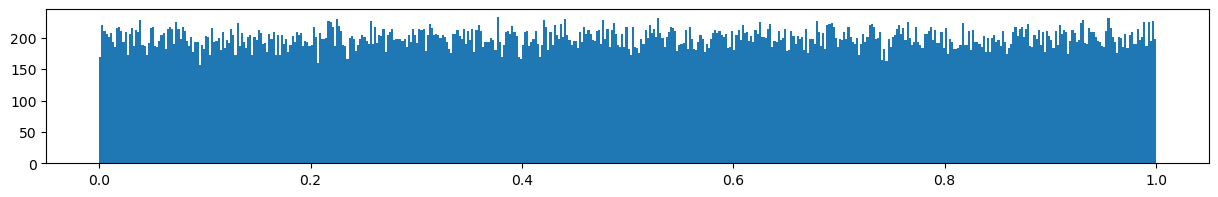

In [69]:
import matplotlib.pyplot as plt

x = np.random.rand(100000)
#print(x)
plt.figure(figsize=(15,2))   # 그래프크기
plt.hist(x,bins=500)
plt.show()


### **randn사용(정규분포)

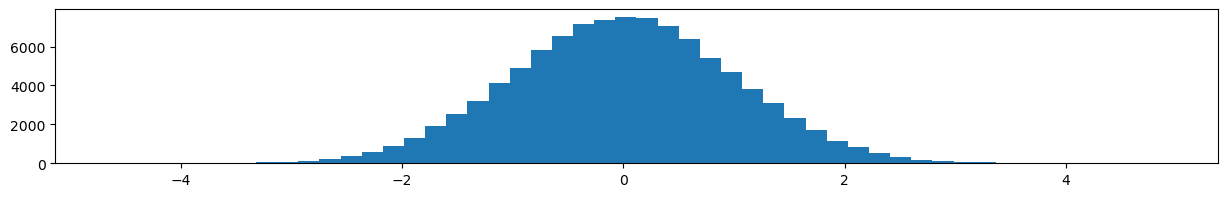

In [73]:
import matplotlib.pyplot as plt

x = np.random.randn(100000)  #정규분포(표준정규분포는 평균0, 표준편차가 1인 정규분포)
#print(x)
plt.figure(figsize=(15,2))   # 그래프크기
plt.hist(x,bins=50)
plt.show()

In [75]:
# 1차원 난수 배열
print(np.random.rand(3)) #균등분포
print(np.random.randn(3)) #정규분포

[0.83383961 0.11969045 0.21321212]
[-7.16615587e-01 -1.08554984e+00 -1.07787557e-03]


In [110]:
# 2차원 난수 배열
np.random.random((2,5)) #2행 5열짜리 균등분포(0~1) 난수 배열

array([[0.59220973, 0.53903361, 0.21681184, 0.2369853 , 0.60175453],
       [0.35689852, 0.02379759, 0.66382102, 0.6749949 , 0.35221254]])

In [111]:
np.random.uniform(low=-2,high=2,size=(2,5)) #2행 5열짜리 균등분포 (-2 ~ 2미만) 난수 배열

array([[-1.49242163, -0.03594871, -1.32063463,  0.08769662,  1.40451496],
       [-0.86264737,  0.32633769,  0.22513842, -0.93986575, -1.8682086 ]])

### **normal

In [112]:
np.random.normal(size=(2,5))  # 2행 5열짜리 정규분포(평균0, 표준편차1) 난수배열

array([[ 0.84663708,  0.13763919, -0.51512952,  0.72761702, -0.10910001],
       [ 0.89196312,  0.75306149,  0.16872916, -1.13690863, -1.20128986]])

In [115]:
np.random.normal(-1,1,size=(2,5))  # 2행 5열짜리 정규분포(평균-1, 표준편차1) 난수배열

array([[-1.56467438, -0.83989959, -0.89662931,  0.41128457, -0.09264806],
       [-0.8308517 , -0.91167051, -0.03783811, -1.13193692, -0.8506259 ]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기

- np.arange(from,to,by,dtype) : from부터  to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from,to,num) :from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

### arange

In [116]:
np.arange(10,30,5,dtype=np.float64)

array([10., 15., 20., 25.])

In [120]:
np.arange(0,2.1,0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

### linspace : 특정한 범위의 수들을 많이 생성할 때

In [121]:
np.linspace(0,5,6)

array([0., 1., 2., 3., 4., 5.])

In [122]:
np.linspace(0,5,5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [134]:
### linspace : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 1000)
y = np.sin(x)

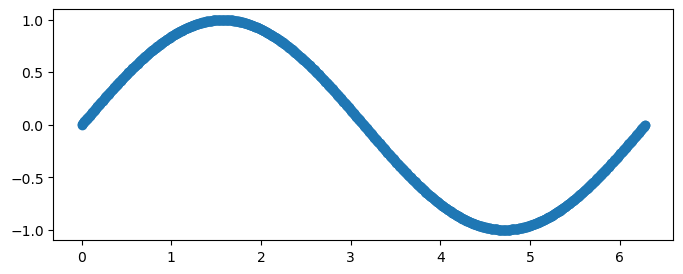

In [135]:
plt.figure(figsize=(8,3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원변경

- reshape(행수,열수) : -1 가능
- resize(행수,열수)  : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [136]:
t = np.random.random((2,3))
t

array([[0.75136233, 0.61632781, 0.87762357],
       [0.91727378, 0.05826489, 0.19574905]])

In [147]:
np.array([1,2,3])*3 # [1,2,3]*3

array([3, 6, 9])

In [148]:
a = np.round(t*10) #반올림
a

array([[8., 6., 9.],
       [9., 1., 2.]])

In [149]:
a = a.astype(np.int16)  
a

array([[8, 6, 9],
       [9, 1, 2]], dtype=int16)

### <font color=red>※reshape</font>

In [163]:
a.reshape(-1,1)  # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[8],
       [6],
       [9],
       [9],
       [1],
       [2]], dtype=int16)

In [153]:
a.reshape(3,-1)

array([[8, 6],
       [9, 9],
       [1, 2]], dtype=int16)

### * resize

In [154]:
a.resize(2,3)  # 실행결과가 출력 안되면 a가 바뀜
a

array([[8, 6, 9],
       [9, 1, 2]], dtype=int16)

In [158]:
a.reshape((2,3))

array([[8, 6, 9],
       [9, 1, 2]], dtype=int16)

In [157]:
a.resize((3,2))
a

array([[8, 6],
       [9, 9],
       [1, 2]], dtype=int16)

In [160]:
a.resize(2,-1)  # resize는 -1 사용불가

ValueError: negative dimensions not allowed

### 전치행렬  (x행 y열 => y행 x열)

In [165]:
a.T     # a의 전치행렬

array([[8, 9, 1],
       [6, 9, 2]], dtype=int16)

In [167]:
a.transpose()  # a의 전치행렬

array([[8, 9, 1],
       [6, 9, 2]], dtype=int16)